In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MultiLabel.csv')

In [ ]:
df.head(15)

,artist,genre,title,album,year,lyrics,labels
0,Nirvana,Rock,You Know You’re Right,Nirvana,2002.0,I will never bother you\nI will never promise ...,"Calmness, Sadness"
1,Damian Marley,Reggae,Here We Go,Stony Hill,2017.0,Here we go\nMy big ego is gonna get me in trou...,"Power, Tension"
2,The Mission UK,Rock,Jade,Another Fall from Grace,2016.0,She came as Lolita dressed as Venus\nAnd adorn...,"Amazement, Calmness, Solemnity, Tenderness"
3,UB40,Reggae,Food For Thought,Signing Off,1980.0,"Ivory Madonna, dying in the dust\nWaiting for ...","Joyful activation, Sadness, Tension"
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,1996.0,I was totin' my pack along the dusty Winnemucc...,"Amazement, Calmness, Joyful activation"
5,Alan Jackson,Country,It’s Five O’Clock Somewhere,Greatest Hits Volume II Disc 1,2003.0,The sun is hot and that old clock is movin' sl...,"Sadness, Solemnity, Tension"
6,Snoop Dogg,Hip-Hop,Beautiful,Paid Tha Cost To Be Da Bo$$,2002.0,"Beautiful, I just want you to know\nYou're my ...","Amazement, Joyful activation, Solemnity, Tende..."
7,Pink Floyd,Rock,Hey You,The Wall,1979.0,"Hey you\nOut there in the cold, getting lonely...","Nostalgia, Power, Sadness, Tenderness"
8,De La Soul,Hip-Hop,Buddy,3 Feet High and Rising,1989.0,"Hello\nMeany, meany, meany, meany (Say What?)\...","Amazement, Joyful activation, Tenderness"
9,Placebo,Rock,Running Up That Hill,Covers,2003.0,"""If I only could, I'd be running up that hill\...","Sadness, Tenderness, Tension"


In [ ]:
df.shape

(1160, 7)

In [ ]:
moods = []
for i in df.labels:
    mood_temp =  (i.split(","))
    for j in mood_temp:
        moods.append(j.strip())

In [ ]:
moods = list(set(moods))

In [ ]:
moods

['Sadness',
 'Tension',
 'Joyful activation',
 'Calmness',
 'Power',
 'Nostalgia',
 'Amazement',
 'Solemnity',
 'Tenderness']

In [ ]:
def contains_string(s,word):
    if word in s:
        return 1
    return 0

In [ ]:
for i in moods:
    df[i] = [contains_string(x,i) for x in df.labels]

In [ ]:
df.head(10)

,artist,genre,title,album,year,lyrics,labels,Sadness,Tension,Joyful activation,Calmness,Power,Nostalgia,Amazement,Solemnity,Tenderness
0,Nirvana,Rock,You Know You’re Right,Nirvana,2002.0,I will never bother you\nI will never promise ...,"Calmness, Sadness",1,0,0,1,0,0,0,0,0
1,Damian Marley,Reggae,Here We Go,Stony Hill,2017.0,Here we go\nMy big ego is gonna get me in trou...,"Power, Tension",0,1,0,0,1,0,0,0,0
2,The Mission UK,Rock,Jade,Another Fall from Grace,2016.0,She came as Lolita dressed as Venus\nAnd adorn...,"Amazement, Calmness, Solemnity, Tenderness",0,0,0,1,0,0,1,1,1
3,UB40,Reggae,Food For Thought,Signing Off,1980.0,"Ivory Madonna, dying in the dust\nWaiting for ...","Joyful activation, Sadness, Tension",1,1,1,0,0,0,0,0,0
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,1996.0,I was totin' my pack along the dusty Winnemucc...,"Amazement, Calmness, Joyful activation",0,0,1,1,0,0,1,0,0
5,Alan Jackson,Country,It’s Five O’Clock Somewhere,Greatest Hits Volume II Disc 1,2003.0,The sun is hot and that old clock is movin' sl...,"Sadness, Solemnity, Tension",1,1,0,0,0,0,0,1,0
6,Snoop Dogg,Hip-Hop,Beautiful,Paid Tha Cost To Be Da Bo$$,2002.0,"Beautiful, I just want you to know\nYou're my ...","Amazement, Joyful activation, Solemnity, Tende...",0,0,1,0,0,0,1,1,1
7,Pink Floyd,Rock,Hey You,The Wall,1979.0,"Hey you\nOut there in the cold, getting lonely...","Nostalgia, Power, Sadness, Tenderness",1,0,0,0,1,1,0,0,1
8,De La Soul,Hip-Hop,Buddy,3 Feet High and Rising,1989.0,"Hello\nMeany, meany, meany, meany (Say What?)\...","Amazement, Joyful activation, Tenderness",0,0,1,0,0,0,1,0,1
9,Placebo,Rock,Running Up That Hill,Covers,2003.0,"""If I only could, I'd be running up that hill\...","Sadness, Tenderness, Tension",1,1,0,0,0,0,0,0,1


In [ ]:
df.columns.get_loc("Solemnity")

14

In [ ]:
df.columns.get_loc("Sadness")

7

In [ ]:
split_index = int(len(df)*0.8)
train = df.loc[1:split_index]
test = df.loc[split_index+1:]

In [ ]:
print(train)

             artist    genre  ... Solemnity Tenderness
1     Damian Marley   Reggae  ...         0          0
2    The Mission UK     Rock  ...         1          1
3              UB40   Reggae  ...         0          0
4       Johnny Cash  Country  ...         0          0
5      Alan Jackson  Country  ...         1          0
..              ...      ...  ...       ...        ...
924     Rita Marley   Reggae  ...         1          1
925     Maxi Priest   Reggae  ...         0          0
926       Catatonia     Rock  ...         0          0
927   Reba McEntire  Country  ...         1          0
928  Desmond Dekker   Reggae  ...         0          1

[928 rows x 16 columns]


In [ ]:
print(test)

             artist    genre  ... Solemnity Tenderness
929    Tarrus Riley   Reggae  ...         0          1
930     Johnny Cash  Country  ...         0          1
931      The Smiths     Rock  ...         0          0
932   Reba McEntire  Country  ...         1          1
933           JAY-Z  Hip-Hop  ...         0          0
...             ...      ...  ...       ...        ...
1155    The Beatles     Rock  ...         0          1
1156    The Sundays     Rock  ...         0          1
1157       The Cure     Rock  ...         1          0
1158   Garth Brooks  Country  ...         0          1
1159   Alan Jackson  Country  ...         0          0

[231 rows x 16 columns]


In [ ]:
models = []
for i in moods:
    print ("************",i,"***********")
    # Build the model
    model = make_pipeline(TfidfVectorizer(), MultinomialNB())
    # Train the model using the training data
    model.fit(train.lyrics, train[i])
    # Predict the categories of the test data
    predicted_categories = model.predict(test.lyrics)
    
    models.append(model)
    print ("Accuracy: ",str(accuracy_score(test[i],predicted_categories)*100),"%")


************ Sadness ***********
Accuracy:  68.3982683982684 %
************ Tension ***********
Accuracy:  65.36796536796537 %
************ Joyful activation ***********
Accuracy:  70.12987012987013 %
************ Calmness ***********
Accuracy:  75.32467532467533 %
************ Power ***********
Accuracy:  70.12987012987013 %
************ Nostalgia ***********
Accuracy:  61.038961038961034 %
************ Amazement ***********
Accuracy:  82.25108225108225 %
************ Solemnity ***********
Accuracy:  67.96536796536796 %
************ Tenderness ***********
Accuracy:  63.20346320346321 %


## **USING VADER LEXICON FOR MOOD RECOGNITION**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
negative = []
neutral = []
positive = []

#Initialize the model
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sdd = SentimentIntensityAnalyzer()
#Iterate for each row of lyrics and append the scores
for i in df.index:
    scores = sdd.polarity_scores(df['lyrics'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
  
#Create 3 columns to the main data frame  for each score



In [ ]:
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive

df.head(15)

,artist,genre,title,album,year,lyrics,labels,Sadness,Amazement,Power,Solemnity,Tension,Tenderness,Nostalgia,Joyful activation,Calmness,negative,neutral,positive
0,Nirvana,Rock,You Know You’re Right,Nirvana,2002.0,I will never bother you\nI will never promise ...,"Calmness, Sadness",1,0,0,0,0,0,0,0,1,0.068,0.814,0.119
1,Damian Marley,Reggae,Here We Go,Stony Hill,2017.0,Here we go\nMy big ego is gonna get me in trou...,"Power, Tension",0,0,1,0,1,0,0,0,0,0.117,0.794,0.089
2,The Mission UK,Rock,Jade,Another Fall from Grace,2016.0,She came as Lolita dressed as Venus\nAnd adorn...,"Amazement, Calmness, Solemnity, Tenderness",0,1,0,1,0,1,0,0,1,0.109,0.750,0.142
3,UB40,Reggae,Food For Thought,Signing Off,1980.0,"Ivory Madonna, dying in the dust\nWaiting for ...","Joyful activation, Sadness, Tension",1,0,0,0,1,0,0,1,0,0.054,0.858,0.088
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,1996.0,I was totin' my pack along the dusty Winnemucc...,"Amazement, Calmness, Joyful activation",0,1,0,0,0,0,0,1,1,0.018,0.930,0.052
5,Alan Jackson,Country,It’s Five O’Clock Somewhere,Greatest Hits Volume II Disc 1,2003.0,The sun is hot and that old clock is movin' sl...,"Sadness, Solemnity, Tension",1,0,0,1,1,0,0,0,0,0.116,0.751,0.133
6,Snoop Dogg,Hip-Hop,Beautiful,Paid Tha Cost To Be Da Bo$$,2002.0,"Beautiful, I just want you to know\nYou're my ...","Amazement, Joyful activation, Solemnity, Tende...",0,1,0,1,0,1,0,1,0,0.032,0.764,0.204
7,Pink Floyd,Rock,Hey You,The Wall,1979.0,"Hey you\nOut there in the cold, getting lonely...","Nostalgia, Power, Sadness, Tenderness",1,0,1,0,0,1,1,0,0,0.104,0.851,0.045
8,De La Soul,Hip-Hop,Buddy,3 Feet High and Rising,1989.0,"Hello\nMeany, meany, meany, meany (Say What?)\...","Amazement, Joyful activation, Tenderness",0,1,0,0,0,1,0,1,0,0.026,0.825,0.149
9,Placebo,Rock,Running Up That Hill,Covers,2003.0,"""If I only could, I'd be running up that hill\...","Sadness, Tenderness, Tension",1,0,0,0,1,1,0,0,0,0.060,0.834,0.106


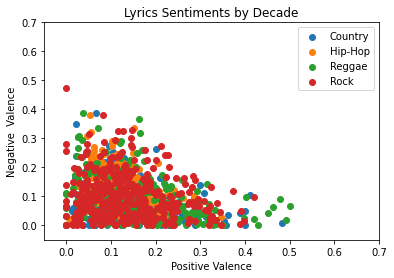

In [ ]:
for name, group in df.groupby('genre'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)
plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [ ]:
def mood_analysis(lyrical_mood):
    score = SentimentIntensityAnalyzer().polarity_scores(lyrical_mood)
    if score['neg'] > score['pos']:
        print("Negative mood")
    elif score['neg'] < score['pos']:
        print("Positive mood")
    else:
        print("Neutral mood")
mood_analysis('Waiting for the manna coming from the west Barren  her bosom, empty  her eyes Death a certain harvest scattered  the skies Skin  bones creeping, doesnt know hes dead')


Negative mood


In [ ]:
Txt = 'Waiting for the manna coming from the west Barren  her bosom, empty  her eyes Death a certain harvest scattered  the skies Skin  bones creeping, doesnt know hes dead'
sdd.polarity_scores(Txt)

{'compound': -0.0408, 'neg': 0.166, 'neu': 0.672, 'pos': 0.162}

In [ ]:
from sklearn.model_selection import train_test_split